<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/3-Regresion-Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#El codigo fuente fue obtenido de la página: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
#La adaptación del codigo fuente fue realizada por el docente de la Universidad ICESI Breyner Posso Bautista para la clase de laboratorio de Inteligencia Artificial I en el periodo semestral 2023-1.

In [ ]:
#Organización del codigo con comentarios faltantes para mejorar la compresión del ejercicio por Diana Olano.

Valores de los atributos de acuerdo con el contexto del problema.

Nombre de los posibles atributos de entrada:
0   Pregnancies (tiene ceros): es normal que hayan valores cero en este atributo.
1   Glucose (tiene ceros) : NO es normal que hayan valores cero en este atributo.
2   BloodPressure (tiene ceros): NO es normal que hayan valores cero en este atributo.
3   SkinThickness (tiene ceros): NO es normal que hayan valores cero en este atributo.
4   Insulin (tiene ceros): NO es normal que hayan valores cero en este atributo.
5   BMI (tiene ceros): NO es normal que hayan valores cero en este atributo.
6   DiabetesPedigreeFunction (NO tiene ceros)
7   Age (NO tiene ceros)

## **0. Importar las librerías**

In [19]:
#Se importan las librerias necesarias para realizar el ejercicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Cargar un conjunto de datos tabulares.**

In [20]:
#Importar el dataset del github
dataset = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/diabetes_eda.csv',na_values='?')

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación**

### Tamaño del dataset

In [21]:
#Se utiliza para obtener las dimensiones o la forma (shape en inglés) del conjunto de datos almacenado en la variable "dataset".
dataset.shape

(768, 9)

### Información general

In [22]:
#Es utilizada para obtener información sobre el dataset, por ejemplo los tipos de datos que manejan las variables en el conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Visión general del dataset

In [23]:
#Se utiliza para mostrar las primeras filas del conjunto de datos dataset. Cuando se llama a head() en un DataFrame, muestra por defecto las primeras 5 filas del DataFrame. Esto puede ser útil para obtener una vista previa rápida de los datos y entender su estructura antes de realizar análisis más detallados.
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
#Se utiliza para mostrar las últimas filas de un conjunto de datos. Por defecto, mostrará las últimas 5 filas del DataFrame.
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Análisis Univariado

In [25]:
# Se obtienen algunas estadísticas básicas de tendencia central para cada uno de los atributos
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


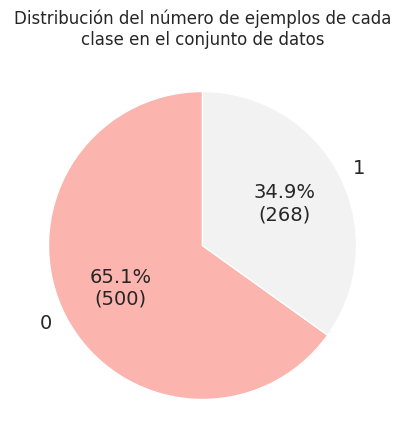

In [26]:
#Econtremos cómo están repartidas las categorías en el conjunto de datos.
conteo_de_ejemplos_por_clase = dataset['Outcome'].value_counts()

#Revisemos esta información de forma gráfica.
#-------------------------------------------------------------------------------
#Usemos un gráfico tipo pastel desde pandas.
#-------------------------------------------------------------------------------
conteo_de_ejemplos_por_clase.plot(kind='pie',
                                    figsize=(5, 5),
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría.
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo)
plt.ylabel('')
plt.show()

### Análisis Bivariado

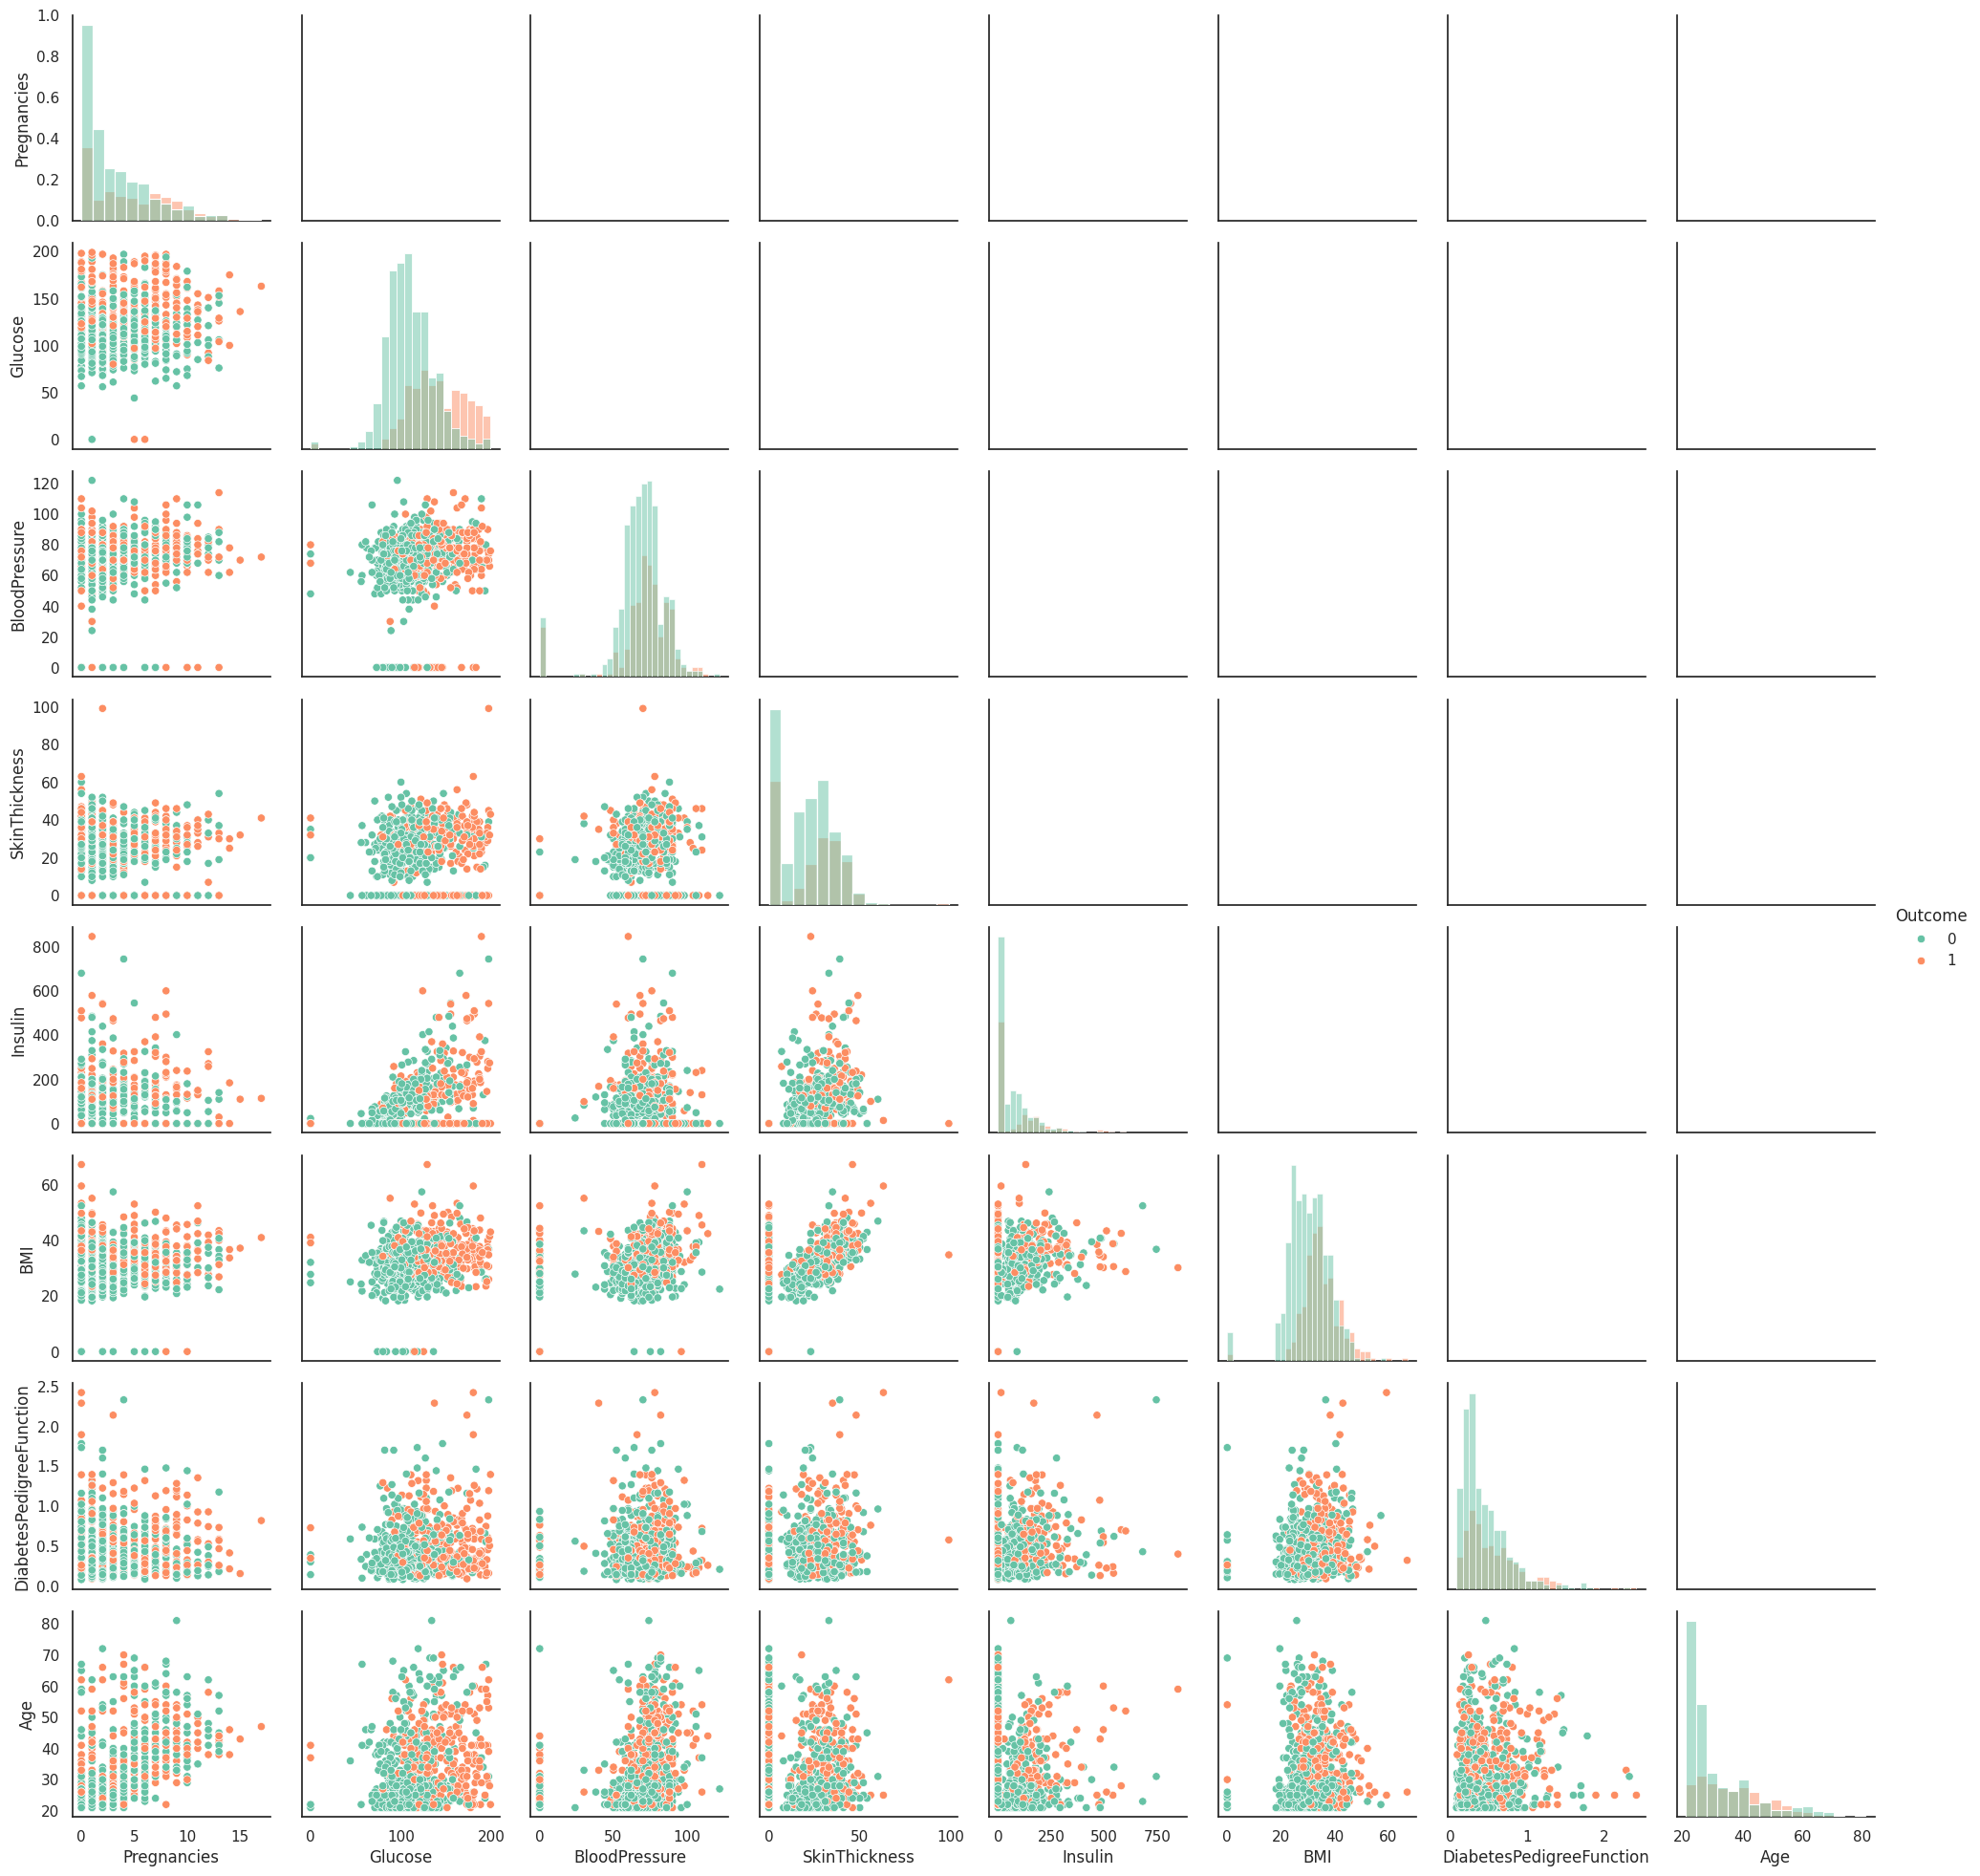

In [27]:
#Gráfico de pares para explorar las relaciones y distribuciones de las variables en el conjunto de datos dataset.

sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=dataset.iloc[:,:],hue='Outcome',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

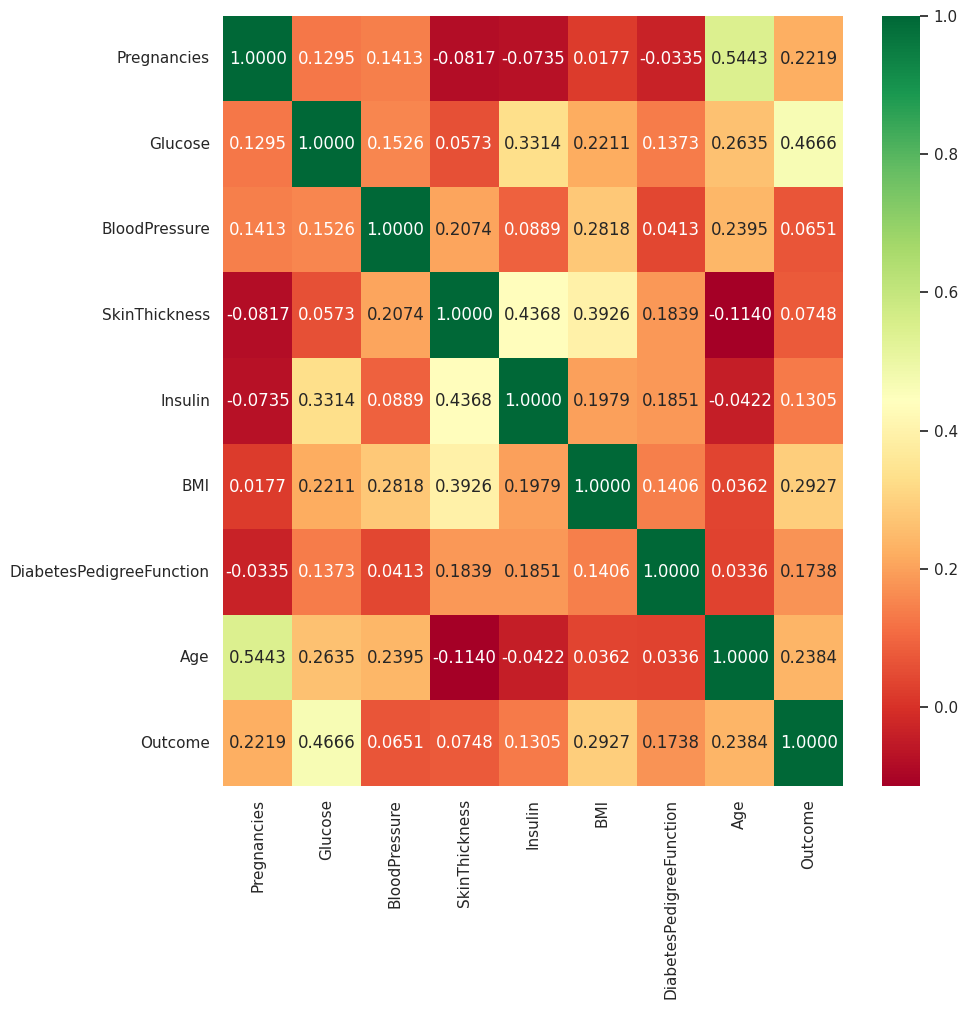

In [28]:
#Matriz de correlación del DataFrame con valores de correlación entre -1 y 1, utilizando una paleta de colores verde-amarillo-rojo para resaltar las relaciones positivas y negativas, respectivamente.
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',fmt='0.4f')

## Limpieza

In [38]:
# Es recomendable hacer una copia (profunda) del dataframe original antes de modificarlo.
df_clean = dataset.copy()

In [39]:
# Otro aspecto a tener en  cuenta es revisar los valores de los atributos de acuerdo con el contexto del problema.

#Nombre de los posibles atributos de entrada:
# 0   Pregnancies (tiene ceros): es normal que hayan valores cero en este atributo.
# 1   Glucose (tiene ceros) : NO es normal que hayan valores cero en este atributo.
# 2   BloodPressure (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 3   SkinThickness (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 4   Insulin (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 5   BMI (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 6   DiabetesPedigreeFunction (NO tiene ceros)
# 7   Age (NO tiene ceros)

n_rows, n_cols = df_clean.shape

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    count = (df_clean[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    print("\n")

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


Atributo: Glucose
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: BloodPressure
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: SkinThickness
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Insulin
Número de valores 0:  138
Porcentaje de valores cero: 17.97


Atributo: BMI
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00




In [40]:
# Se van a cambiar los valores cero por los valores de la media para el atributo en particular, pero teniendo en cuenta la clase a la que pertencen.
predictores = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df_1 = df_clean.loc[df_clean['Outcome'] == 1]
df_0 = df_clean.loc[df_clean['Outcome'] == 0]

for atributo in predictores:
    df_1 = df_1.replace({atributo:0}, np.median(df_1[atributo]))
    df_0 = df_0.replace({atributo:0}, np.median(df_0[atributo]))

dataframe = [df_1, df_0]
dataset = pd.concat(dataframe)

### Outliers

In [ ]:
for atr in df_clean.columns:
  arr1 = df_clean[atr].values

  q1 = np.quantile(arr1, 0.25)
  q3 = np.quantile(arr1, 0.75)
  med = np.median(arr1)
  iqr = q3-q1

  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  out = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]

  #ELIMINACIÓN DE OUTLIERS
  significant_outliers = len(out) / df_clean.shape[0] > 0.1

  if significant_outliers:
    df_clean = df_clean[~df_clean[atr].isin(out)]
    df_clean = df_clean.reset_index(drop=True)

  print('Los outliers para {} son: {} \n'.format(atr,out))

df_clean.plot(kind='box', subplots=True, figsize=(50,50), layout=(5,4))

In [ ]:
#Crea un gráfico de barras horizontales que muestra las correlaciones de las variables del DataFrame df_clean con respecto a la columna "Outcome".
plt.figure(figsize=(10, 10))
df_clean.corr()['Outcome'].sort_values().head(len(df_clean.columns))[:-1].plot.barh()
plt.show()

# 3. Modelo

In [ ]:
#Preparación de datos para el entrenamiento de un modelo de aprendizaje automático:

#predictores = ['Glucose']: Se define una lista llamada predictores que contiene el nombre de una característica (predictor) específica, en este caso, 'Glucose'.

#target = 'Outcome': Se define una variable llamada target que contiene el nombre de la columna "Outcome".
#Esto indica que el objetivo del modelo es predecir los valores de la variable "Outcome" basándose en el valor de la característica 'Glucose'.

#y = df_clean[target].values: Se crea un arreglo y que contiene los valores de la columna "Outcome" (variable objetivo).

#X = df_clean[predictores].values: Se crea un arreglo X que contiene los valores de la columna 'Glucose' (característica).

predictores = ['Glucose']
target = 'Outcome'

y = df_clean[target].values
X = df_clean[predictores].values

In [ ]:
#Libreria que se necesita para partir el conjunto de datos
from sklearn.model_selection import train_test_split

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Importar el modelo de regresión logistica de la biblioteca scikit-learn.
from sklearn.linear_model import LogisticRegression

#Inicialización del modelo:
log_reg_1 = LogisticRegression(solver='lbfgs',max_iter=100)

#solver: Especifica el algoritmo a utilizar para la optimización del modelo.
#max_iter: Especifica el número máximo de iteraciones para la convergencia del modelo.

#Entrenamiento del modelo:
log_reg_1.fit(X_train, y_train)

#Predicción en datos de entrenamiento y prueba:
y_pred_train = log_reg_1.predict(X_train)
y_pred_test = log_reg_1.predict(X_test)

#Predicción de probabilidades:
y_pred_train_proba = log_reg_1.predict_proba(X_train)
y_pred_test_proba = log_reg_1.predict_proba(X_test)

In [ ]:
# Evaluación en el conjunto de entrenamiento

#Importar metrics de la biblioteca scikit-learn para trabajar con métricas de evaluación de modelos.
from sklearn import metrics

#Se calcula la matriz de confusión usando el conjunto de entrenamiento y las predicciones del modelo.
cm = metrics.confusion_matrix(y_train,y_pred_train)

#Se extraen los valores verdaderos positivos (TP),
#verdaderos negativos (TN),
#falsos positivos (FP) y
#falsos negativos (FN) de la matriz de confusión.
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

#Se calcula la tasa de verdaderos positivos (TPR), que es la proporción de casos positivos correctamente clasificados sobre el total de casos positivos.
#Se calcula la tasa de falsos positivos (FPR), que es la proporción de casos negativos incorrectamente clasificados como positivos sobre el total de casos negativos.
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)

#Se muestra la gráfica de la matriz de confusión
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Sin diabetes', 'Con diabetes']
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
# Evaluación en el conjunto de prueba

#Importar metrics de la biblioteca scikit-learn para trabajar con métricas de evaluación de modelos.
from sklearn import metrics

#Se calcula la matriz de confusión usando el conjunto de prueba y las predicciones del modelo.
cm = metrics.confusion_matrix(y_test,y_pred_test)

#Se extraen los valores verdaderos positivos (TP),
#verdaderos negativos (TN),
#falsos positivos (FP) y
#falsos negativos (FN) de la matriz de confusión.
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

#Se calcula la tasa de verdaderos positivos (TPR), que es la proporción de casos positivos correctamente clasificados sobre el total de casos positivos.
#Se calcula la tasa de falsos positivos (FPR), que es la proporción de casos negativos incorrectamente clasificados como positivos sobre el total de casos negativos.
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)

#Se muestra la gráfica de la matriz de confusión
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Sin diabetes', 'Con diabetes']
print(classification_report(y_test, y_pred_test, target_names=target_names))

## Gráfica ROC (Receiver Operating Characteristic) y Métrica AUC(Area Under the Curve)

In [ ]:
#Importar roc_curve y roc_auc_score de la biblioteca scikit-learn para calcular la curva ROC y el área bajo la curva.

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def curva_roc(y_prob, y):

    ns_prob = [0 for _ in range(len(y))]

    #Mantener las probabilidades sólo para el resultado positivo
    y_prob_val_c1 = y_prob[:, 1]

    #Calcular los puntajes
    ns_auc = roc_auc_score(y, ns_prob)
    log_reg_auc = roc_auc_score(y, y_prob_val_c1)

    #Resumen de los puntajes
    print('No Skill: ROC AUC=%.4f' % (ns_auc))
    print('Logistic: ROC AUC=%.4f' % (log_reg_auc))

    #Calcular las curvas ROC
    ns_fpr, ns_tpr, _ = roc_curve(y, ns_prob)
    log_reg_fpr, log_reg_tpr, ths = roc_curve(y, y_prob_val_c1)

    #Graficas de la curva ROC para el modelo
    plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'b', label='No Skill')
    plt.plot(log_reg_fpr, log_reg_tpr, marker='.', color = 'r', label='Logistic')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    #Retorna los umbrales (ths)
    return ths

In [ ]:
ths = curva_roc(y_pred_train_proba,y_train)

In [ ]:
ths = curva_roc(y_pred_test_proba,y_test)